In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [21]:
data = pd.read_csv('Sales_data_zone_wise.csv')

In [23]:
data.head(29)

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055
7,Month - 8,1625696,1665534,2161754,2363315
8,Month - 9,1652644,1873402,1755290,1422059
9,Month - 10,1852450,1913059,1754314,1608387


In [24]:
data.shape

(29, 5)

In [25]:
data.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

# 1. Mean sales generated by each zone

In [31]:
data.mean()

Zone - A       1.540493e+06
Zone - B       1.755560e+06
Zone - C       1.772871e+06
Zone - D       1.842927e+06
Total_sales    6.911851e+06
dtype: float64

# 2. Total sales generated by all zones for each month 

In [27]:
data['Total_sales'] = data.sum(axis=1)

In [28]:
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total_sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


# 3. Check whether all zones generate the same amount of sales

In [29]:
# H0: All zones generate same amount of sales
# H1: At least, one zone generate different amount of sales 

In [38]:
df_melt=pd.melt(data.reset_index(),id_vars=['index'],value_vars=['Zone - A','Zone - B','Zone - C','Zone - D'])

In [39]:
df_melt.columns=['index','treatments','value']

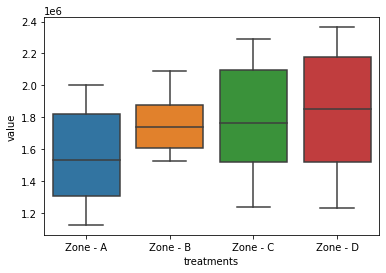

In [40]:
ax=sns.boxplot(x='treatments',y='value',data=df_melt)

In [41]:
fvalue,pvalue=stats.f_oneway(data['Zone - A'],data['Zone - B'],data['Zone - C'],data['Zone - D'])

In [42]:
print(fvalue,pvalue)

5.672056106843581 0.0011827601694503335


In [43]:
# All the zones generate different sales